# Parte III. Relajando las suposiciones

En esta parte final vamos a entender el papel que juegan algunas de las suposiciones básicas del modelo de Hägerstrand, en particular, la suposición de homogeneidad espacial.

Como vimos en los ejercicios anteriores, el modelo original asume que el espacio es homogéneo, esto es, todas las celdas son exáctamente iguales. ¿Que pasaría si esto no fuera así? Para entenderlo, vamos a trabajar con una versión del modelo de difusión que no supone un espacio homogeneo, en esta nueva versión, las celdas tienen un número diferente de habitantes.

### Pregunta rápida: ¿De qué otras formas podríamos romper la suposición de homogeneidad?

Para implementar espacios con diferente número de habitantes en cada celda, PyHagerstrand implementa el modelo `AdvancedDiffusion`, que genera distribuciones de habitantes basadas en distribuciones gaussianas a partir de núcleos de población, es decir, trata de simular la presencia de _pueblos_ en el espacio.

Los parámetros para la clase `AdvancedDiffusion` son muy parecidos a los de `SimpleDiffusion`, pero agrega un par de nuevos parámetros para controlar el escenario de población (recuerden que siempre pueden invocar la ayuda usando `help(AdvancedDiffusion)`):

1. N: Número de renglones y columnas en el espacio (en este caso siempre será cuadrado)
2. mif_size: Tamaño del MIF
3. pob: Número máximo de habitantes en cada celda
4. initial_diff: Lista de los portadores originales del mensaje
5. p0: Probabilidad de contactar a la celda de origen
6. max_iter: Número de iteraciones a simular
7. densidad: Cantidad de núcleos iniciales de población.
8. amplitud: Amplitud del filtro gaussiano para difuminar la población (controla que tanto se difuminan los _pueblos_).

Para entender cómo son los escenarios de población que genera el modelo, vamos a jugar un poco con los parámetros involucrados. Primero vamos a ver cómo funciona el parámetro`amplitud`, para esto, vamos a crear dos modelos de difusión con valores diferentes de amplitud:

Populating the interactive namespace from numpy and matplotlib


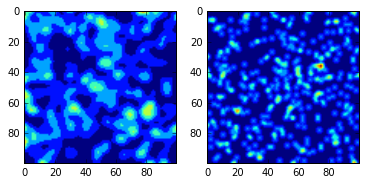

In [4]:
%pylab inline
from haggerstrand.diffusion import AdvancedDiffusion
ad_1 = AdvancedDiffusion(100,5,25,[(50,50)],0.3,25,20,2.0)
ad_2 = AdvancedDiffusion(100,5,25,[(50,50)],0.3,25,20,4.0)
subplot(1,2,1)
plt.imshow(ad_1.space)
subplot(1,2,2)
plt.imshow(ad_2.space)

Como pueden ver, los resultados cuando usamos un valor de 2.0 son más dispersos que cuando usamos un valor de 4.0.

Veamos ahora que pasa con el parámetro `densidad`:

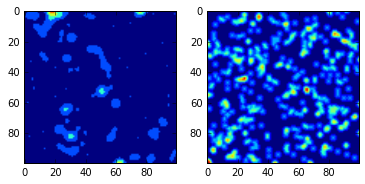

In [6]:
ad_1 = AdvancedDiffusion(100,5,25,[(50,50)],0.3,25,10,4.0)
ad_2 = AdvancedDiffusion(100,5,25,[(50,50)],0.3,25,20,4.0)
subplot(1,2,1)
plt.imshow(ad_1.space)
subplot(1,2,2)
plt.imshow(ad_2.space)

La idea de `densidad` es controlar la cantidad de núcleos de dispersión de población. Entoces, diferentes combinaciones de `densidad` y `amplitud`, nos van a generar diferentes escenarios iniciales de población que tratan de reflejar posibles condiciones en el espacio.

Jueguen un poco con estos parámetros hasta encontrar una combinación que los satisfaga.

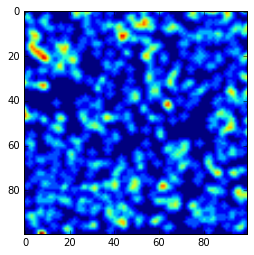

In [8]:
ad = AdvancedDiffusion(100,5,25,[(50,50)],0.3,25,25,2.8)
plt.imshow(ad.space)

Ahora sí, podemos correr simulaciones para ver cómo se comporta el modelo una vez que relajamos la suposición de homogeneidad espacial, empezemos haciendo un poco de difusión espacial:

acabé
Hay 20095 adoptantes de un total de 250000 habitantes
El total de iteraciones realizadas es 25


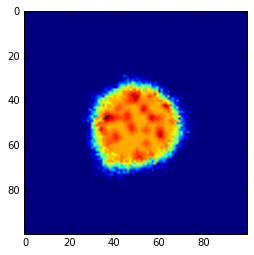

In [9]:
ad.spatial_diffusion()
plt.imshow(ad.result[:,:,24])

Como pueden ver, el resultado es bastante similar al caso homogeneo, sólo que ahora tenemos unas _manchas_ rojas que reflejan la distribución inicial de población.

Por supuesto que también podemos ver una animación:


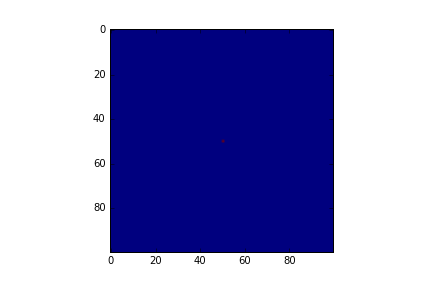
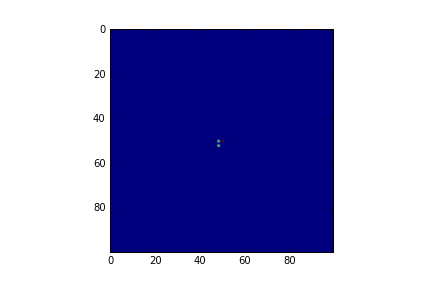
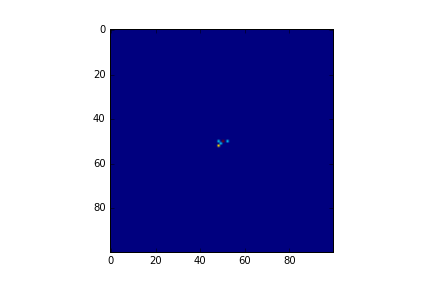
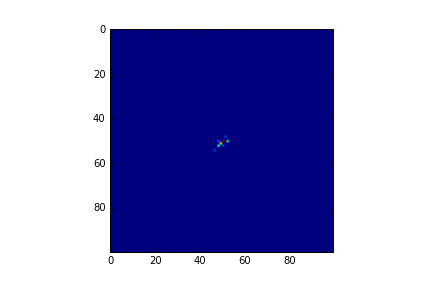
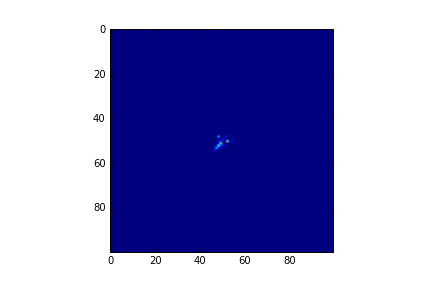
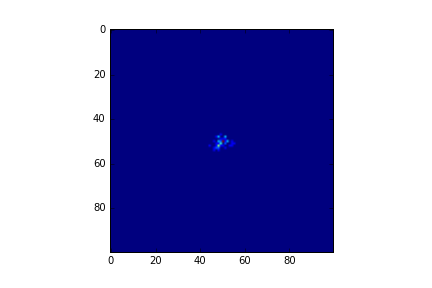
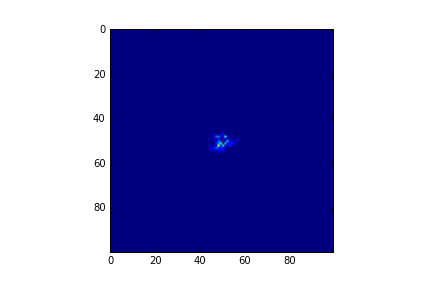
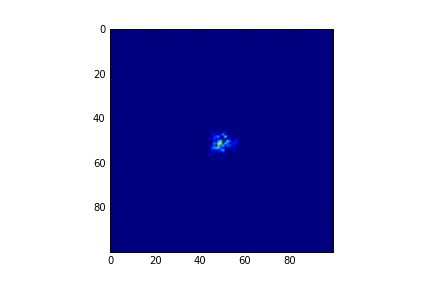
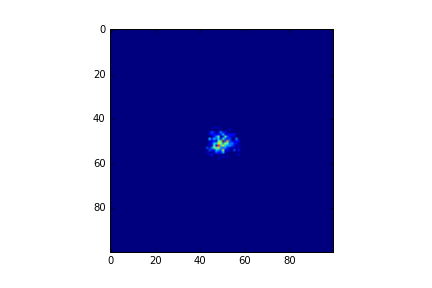
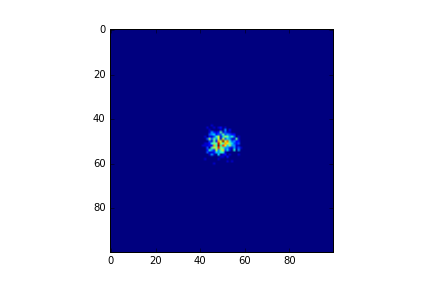
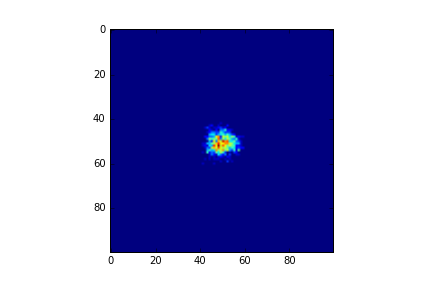
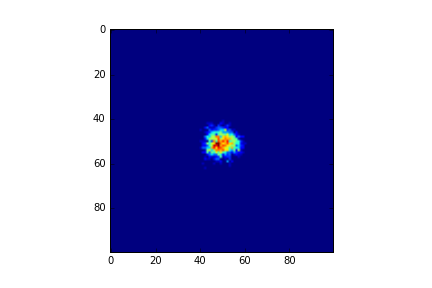
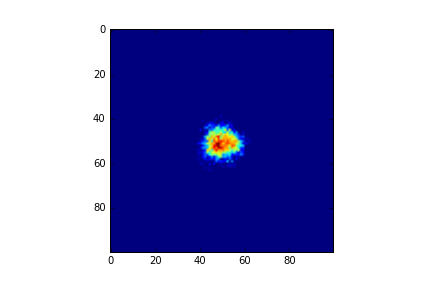
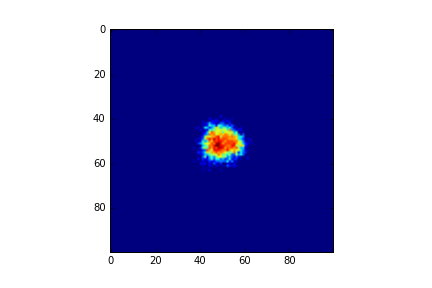
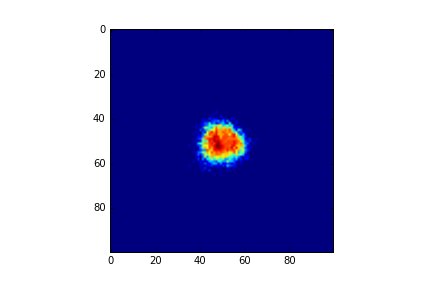
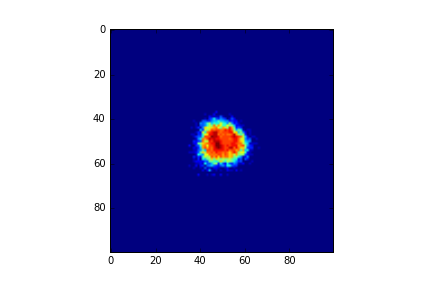
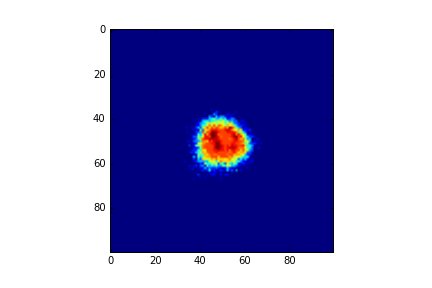
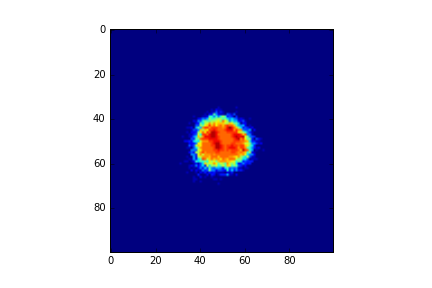
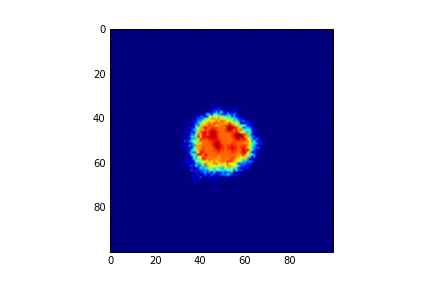
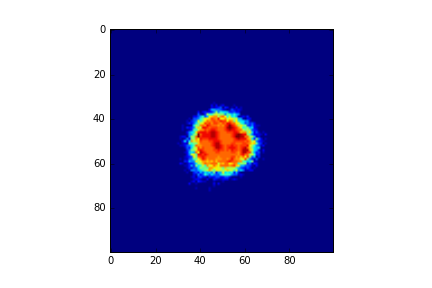
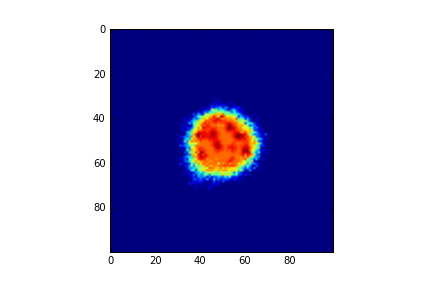
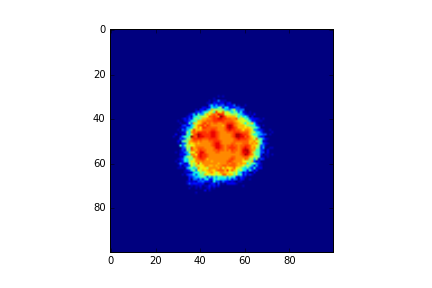
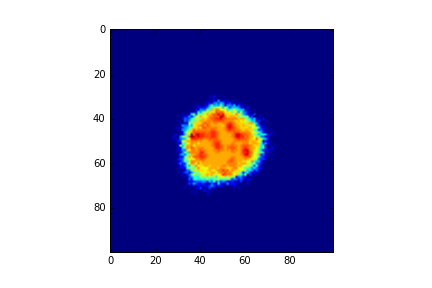
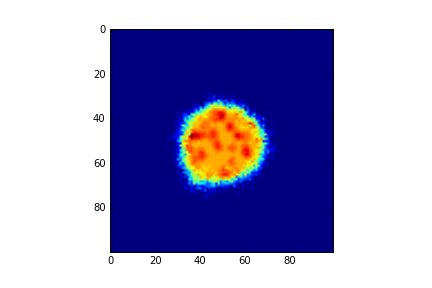
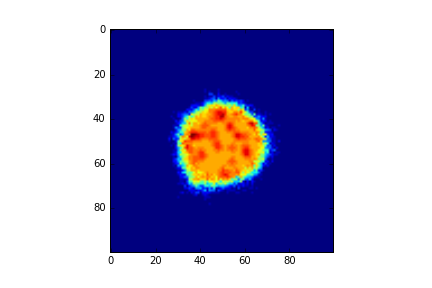

In [11]:
from JSAnimation import IPython_display
import matplotlib.animation as animation
ims = []
fig = plt.figure()
for i in range(0,ad.max_iter):
    im = imshow(ad.result[:,:,i])
    ims.append([im])

animation.ArtistAnimation(fig, ims, interval=100, blit=True)

Ahora surge una pregunta interesante, ¿cómo se comportará la I de Moran sin la suposición de homogeneidad?

In [12]:
import pysal as ps
w = ps.lat2W(ad.N,ad.N,rook=False)
mr = ps.Moran(ad.result[:,:,24].flatten(),w)
print "La I de Moran es %f" % mr.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr.EI 
print "El valor de significancia es %f" % mr.p_rand

La I de Moran es 0.979718
El valor esperado, bajo suposición de normalidad es -0.000100
El valor de significancia es 0.000000


Y ¿comparado con un modelo equivalente pero homogeneo?

In [17]:
from haggerstrand.diffusion import SimpleDiffusion
sd = SimpleDiffusion(100,100,5,20,[(50,50)],0.3,25)
sd.spatial_diffusion()
md = ps.Moran(sd.result[:,:,24].flatten(),w)
print "La I de Moran es %f" % md.I
print "El valor esperado, bajo suposición de normalidad es %f" % md.EI 
print "El valor de significancia es %f" % md.p_rand

acabé
Hay 23407 adoptantes de un total de 200000 habitantes
El total de iteraciones realizadas es 25
La I de Moran es 0.982381
El valor esperado, bajo suposición de normalidad es -0.000100
El valor de significancia es 0.000000


El resultado en ambos casos es una I de Moran muy alta, esto era de esperarse porque los patrones espaciales no son demasiado diferentes. Pero ¿Qué pasa con la difusión aleatoria sobre un campo no-homogeneo?
Primero veamos el resultado:

acabé
Hay 166147 adoptantes de un total de 250000 habitantes
El total de iteraciones realizadas es 25


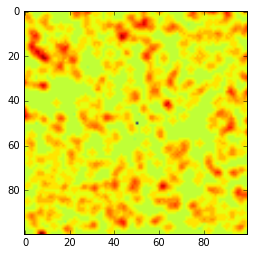

In [21]:
ad.random_diffusion()
plt.imshow(ad.result[:,:,24])

Como pueden var, el resultado refleja la distribución original de la población. En términos del índice de Moran, ¿cómo se ve?

In [22]:
mr = ps.Moran(ad.result[:,:,24].flatten(),w)
print "La I de Moran es %f" % mr.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr.EI 
print "El valor de significancia es %f" % mr.p_rand

La I de Moran es 0.787768
El valor esperado, bajo suposición de normalidad es -0.000100
El valor de significancia es 0.000000


¿Y si lo comparamos con la difusión aleatoria en espacios homogéneos?

In [23]:
sd.random_diffusion()
sr = ps.Moran(sd.result[:,:,24].flatten(),w)
print "La I de Moran es %f" % sr.I
print "El valor esperado, bajo suposición de normalidad es %f" % sr.EI 
print "El valor de significancia es %f" % sr.p_rand

acabé
Hay 199866 adoptantes de un total de 200000 habitantes
El total de iteraciones realizadas es 25
La I de Moran es -0.000362
El valor esperado, bajo suposición de normalidad es -0.000100
El valor de significancia es 0.958338


Como pueden ver, en el caso de la difusión sobre espacios no-homogéneos, la autocorrelación espacial depende más de la distribución original de la población que de el proceso de difusión!
